In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

----

In [3]:
df = pd.read_csv('../data/upbit_combined.csv')

In [3]:
df.head()

,code,trade_date,trade_time,trade_timestamp,high_price,low_price,trade_price,change,change_price,change_rate,timestamp
0,KRW-CTC,20241007,190853,1728328133932,588.5,557.1,567.8,RISE,7.7,0.013748,1728328133965
1,KRW-CTC,20241007,190853,1728328133949,588.5,557.1,567.8,RISE,7.7,0.013748,1728328133986
2,KRW-BTC,20241007,190854,1728328134487,86301000.0,84150000.0,85099000.0,RISE,566000.0,0.006696,1728328134515
3,KRW-GRS,20241007,190854,1728328134699,482.0,465.7,468.6,FALL,11.9,0.024766,1728328134720
4,KRW-GRS,20241007,190854,1728328134699,482.0,465.7,468.4,FALL,12.1,0.025182,1728328134720


In [4]:
len(df.code.unique())

364

In [5]:
df_sorted = df.sort_values(by=['trade_date', 'trade_time'])
df_sorted.to_csv('../data/upbit_sorted.csv', index=False)

In [6]:
for code in df.code.unique():
    df_code = df[df.code == code]
    df_code.to_csv(f'../data/code_aligned/{code}.csv', index=False)

-----

In [2]:
df_sorted = pd.read_csv('../data/upbit_sorted.csv')
df_sorted = df_sorted.drop(columns=['code'])

In [3]:
csv_list = [f for f in os.listdir('../data/code_aligned') if f.endswith('csv')]

In [4]:
prefix = '../data/code_aligned'

In [6]:
for csv in csv_list:
    full_path = os.path.join(prefix, csv)
    temp_df = pd.read_csv(full_path)
    df_sorted = temp_df.sort_values(by=['trade_date', 'trade_time'])
    df_sorted.to_csv(full_path, index=False)

In [ ]:
for csv in csv_list:
    full_path = os.path.join(prefix, csv)
    temp_df = pd.read_csv(full_path)

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(temp_df['trade_timestamp'], temp_df['trade_price'])

    ax.set_xticks(temp_df['trade_timestamp'])
    ax.set_xticklabels(temp_df['trade_date'])
    plt.xticks(rotation=45, fontsize=5)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

    plt.xlabel('Trade Time')
    plt.ylabel('Trade Price')
    plt.tight_layout()
    
    plt.title(csv[:-4])
    plt.savefig(f'graphs/{csv[:-4]}.png', dpi=300, bbox_inches='tight')

-----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import os

In [2]:
files = []
prefix = '../data/from_pyupbit'
csv_files =  os.listdir(prefix)
for file in csv_files:
    if file.startswith('KRW'):
        files.append(os.path.join(prefix, file))
print(files)

['../data/from_pyupbit\\KRW-ARK.csv', '../data/from_pyupbit\\KRW-BTC.csv', '../data/from_pyupbit\\KRW-ETH.csv', '../data/from_pyupbit\\KRW-HIFI.csv', '../data/from_pyupbit\\KRW-SEI.csv', '../data/from_pyupbit\\KRW-SHIB.csv', '../data/from_pyupbit\\KRW-SUI.csv', '../data/from_pyupbit\\KRW-SXP.csv', '../data/from_pyupbit\\KRW-SXP_test.csv', '../data/from_pyupbit\\KRW-UXLINK.csv', '../data/from_pyupbit\\KRW-XRP.csv']


In [4]:
df = pd.read_csv(files[0])

In [6]:
files[0]

'../data/from_pyupbit\\KRW-ARK.csv'

<Axes: xlabel='timestamp'>

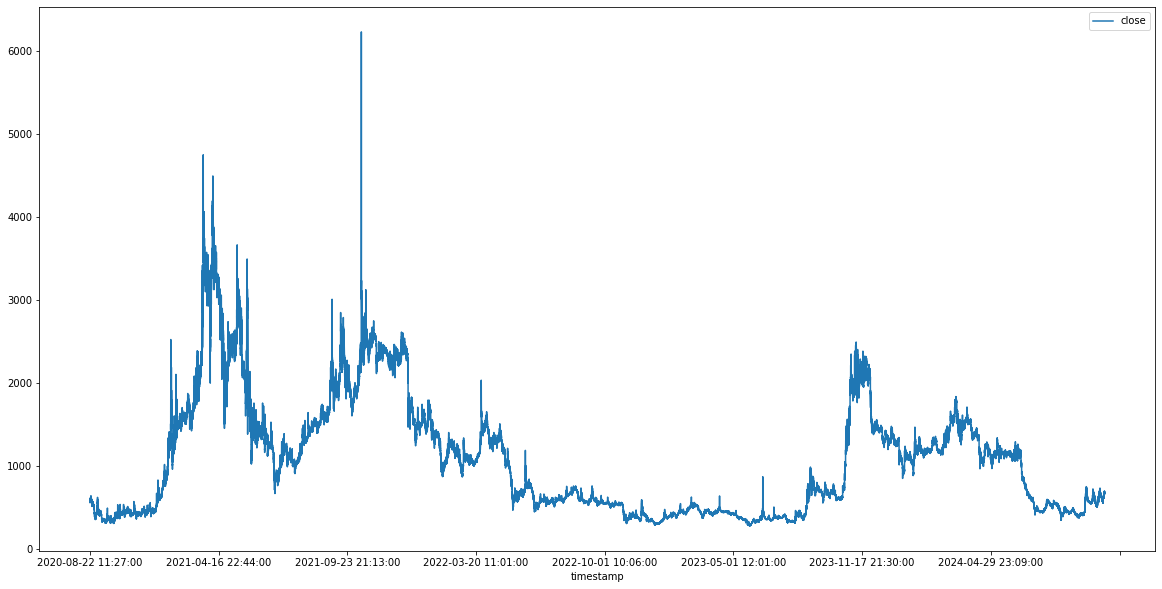

In [5]:
df.plot(x='timestamp', y='close', figsize=(20, 10))

<Axes: xlabel='timestamp'>

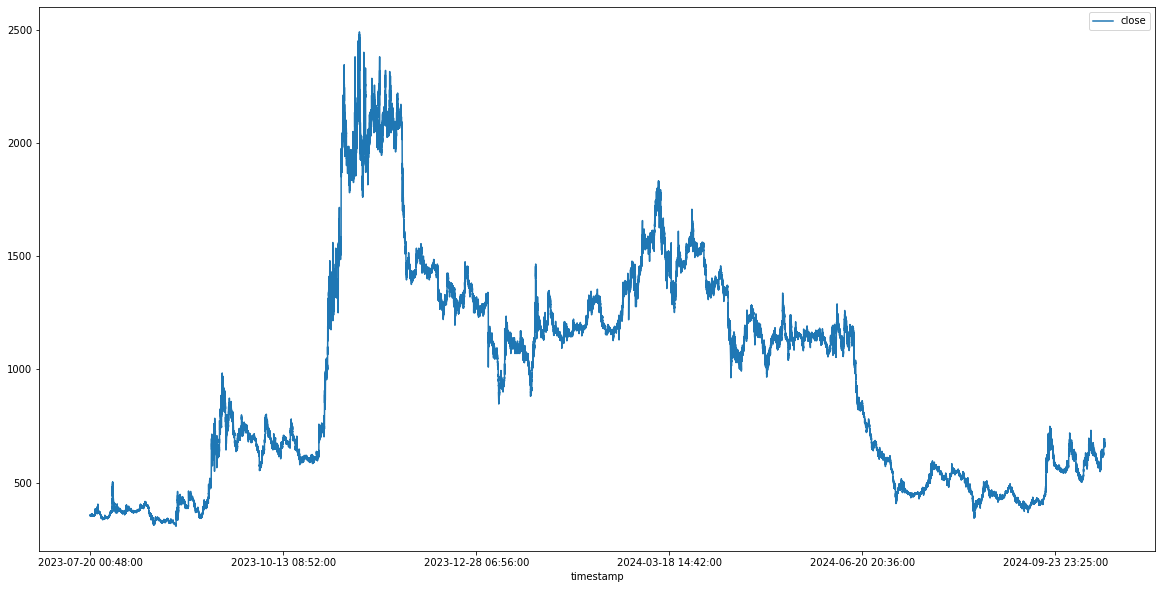

In [8]:
df.iloc[-365*60*24:].plot(x='timestamp', y='close', figsize=(20, 10))

<Axes: xlabel='timestamp'>

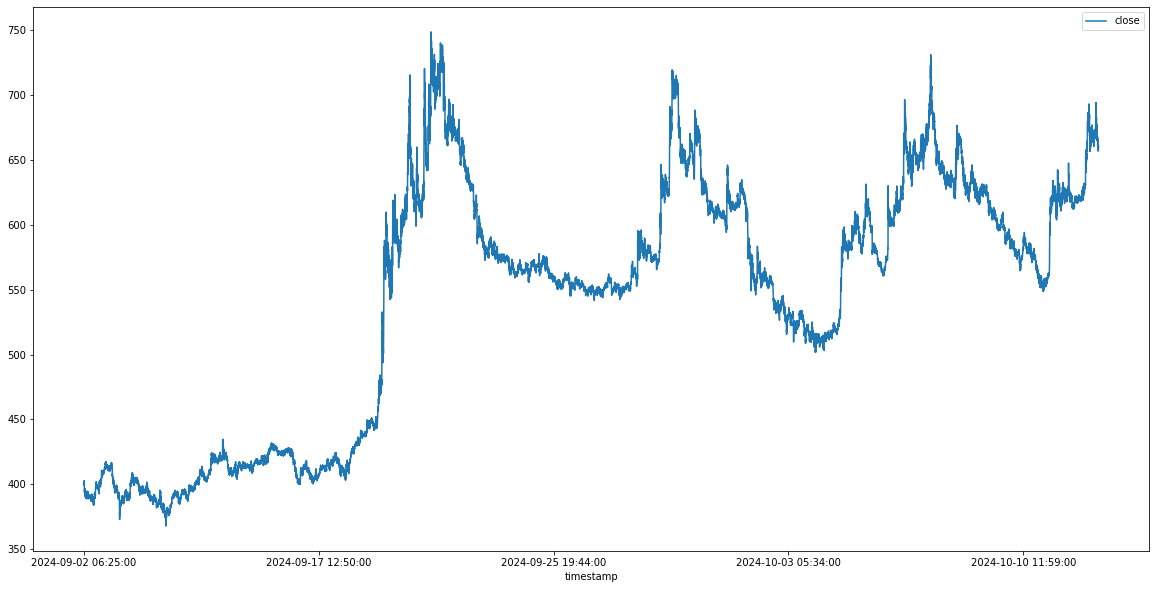

In [9]:
df.iloc[-30*60*24:].plot(x='timestamp', y='close', figsize=(20, 10))

<Axes: xlabel='timestamp'>

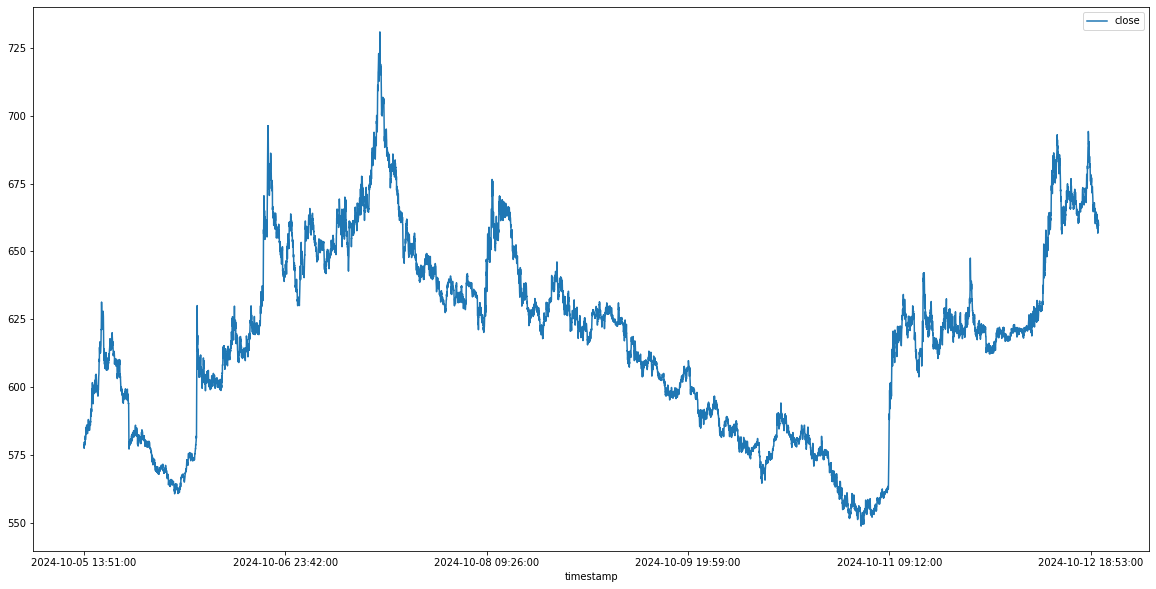

In [10]:
df.iloc[-7*60*24:].plot(x='timestamp', y='close', figsize=(20, 10))

In [24]:
df.tail()

,timestamp,open,high,low,close,volume,value
1576795,2024-10-12 20:08:00,660.1,661.5,660.1,661.5,43947.008730,2.903625e+07
1576796,2024-10-12 20:09:00,661.5,661.5,660.1,660.8,102755.667870,6.787026e+07
1576797,2024-10-12 20:10:00,660.8,660.8,660.3,660.7,19605.391412,1.295274e+07
1576798,2024-10-12 20:11:00,660.7,660.7,659.4,660.3,33766.902404,2.228660e+07
1576799,2024-10-12 20:12:00,659.4,659.7,659.1,659.6,24328.372242,1.604177e+07


In [23]:
import pyupbit

In [42]:
data = pyupbit.get_ohlcv("KRW-ARK", count=28*60, interval='minute1', to='2024-10-13 23:14:00')

In [45]:
data = data.reset_index()

In [46]:
data.rename({'index=': 'timestamp'}, axis=1, inplace=True)

In [47]:
data

,timestamp,open,high,low,close,volume,value
0,2024-10-12 19:04:00,675.7,676.1,674.6,674.6,153082.315711,1.033375e+08
1,2024-10-12 19:05:00,675.1,675.1,671.5,671.6,253525.688729,1.706075e+08
2,2024-10-12 19:06:00,671.2,673.8,670.8,673.5,183618.228803,1.233246e+08
3,2024-10-12 19:07:00,673.5,673.5,671.6,671.8,70503.363919,4.738740e+07
4,2024-10-12 19:08:00,671.8,672.5,671.5,671.7,106657.287762,7.164236e+07
...,...,...,...,...,...,...,...
1675,2024-10-13 23:10:00,677.2,677.2,676.8,677.2,90839.642253,6.150557e+07
1676,2024-10-13 23:11:00,677.3,677.3,674.7,677.0,123429.578529,8.348720e+07
1677,2024-10-13 23:12:00,675.9,677.1,675.9,677.0,43382.716675,2.936235e+07
1678,2024-10-13 23:13:00,677.0,677.0,676.0,676.9,71348.518425,4.825442e+07


<Axes: xlabel='timestamp'>

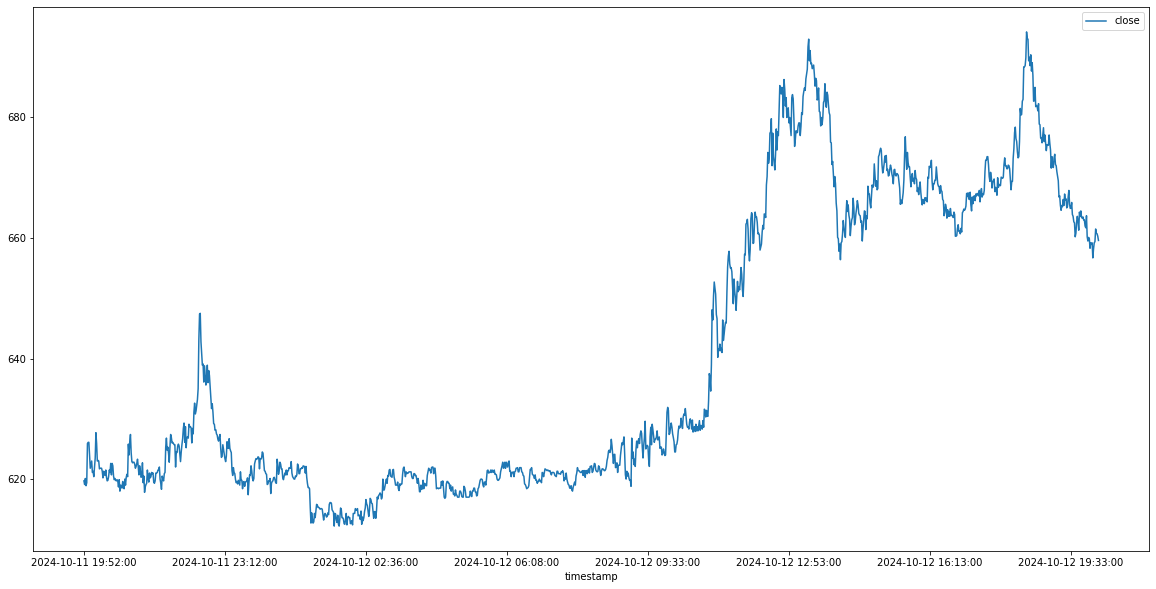

In [48]:
df.iloc[-60*24:].plot(x='timestamp', y='close', figsize=(20, 10))

<Axes: xlabel='timestamp'>

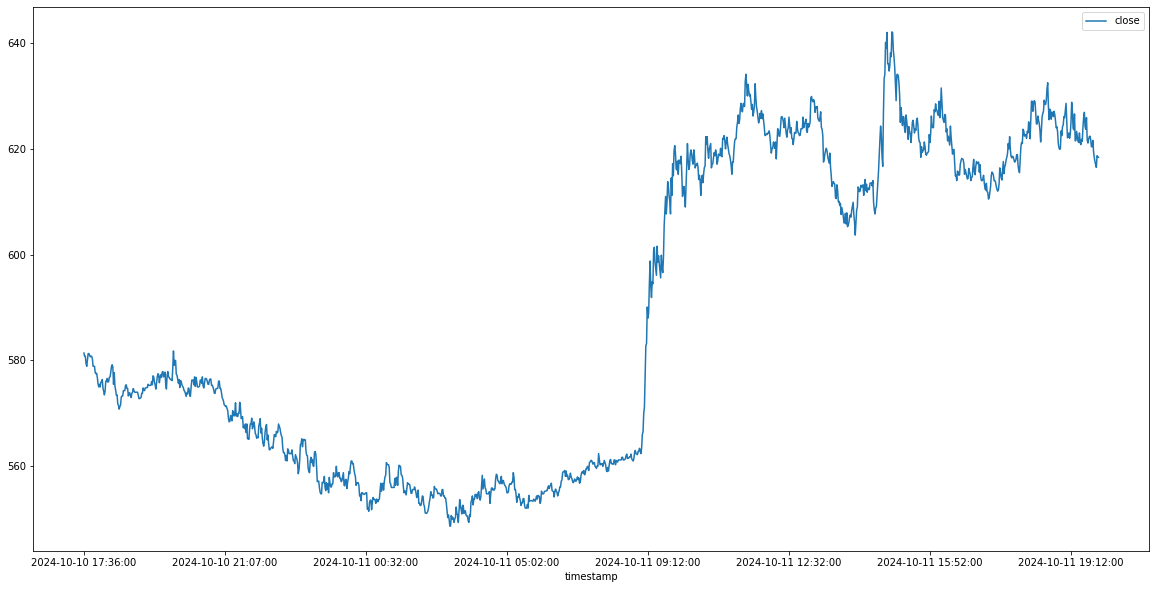

In [49]:
df.iloc[(-60*24)*2:(-60*24)].plot(x='timestamp', y='close', figsize=(20, 10))

<Axes: xlabel='timestamp'>

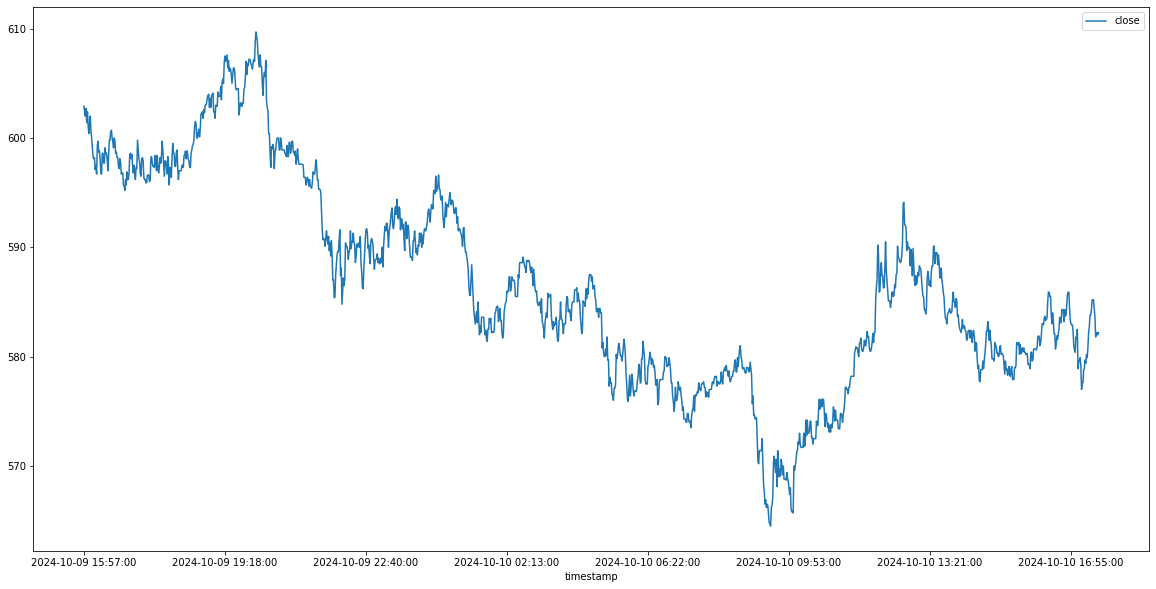

In [50]:
df.iloc[(-60*24)*3:(-60*24)*2].plot(x='timestamp', y='close', figsize=(20, 10))

<Axes: xlabel='timestamp'>

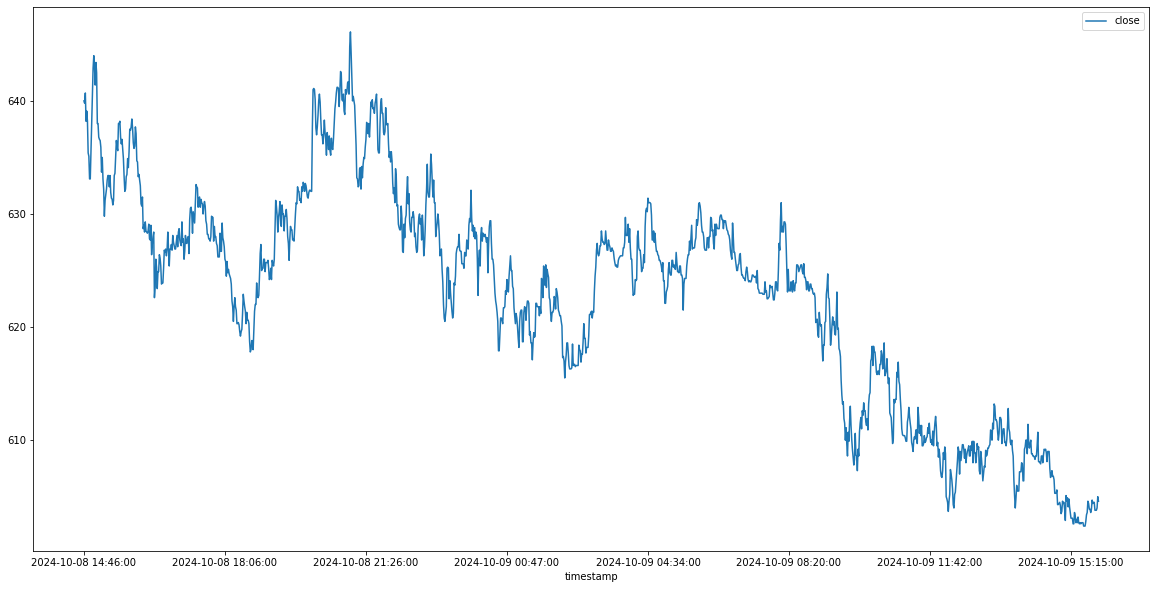

In [52]:
df.iloc[(-60*24)*4:(-60*24)*3].plot(x='timestamp', y='close', figsize=(20, 10))

29.48559654996036
9.425520404925946
9.672431323523837
21.49427866002167
19.225985060942545
17.513258090274597


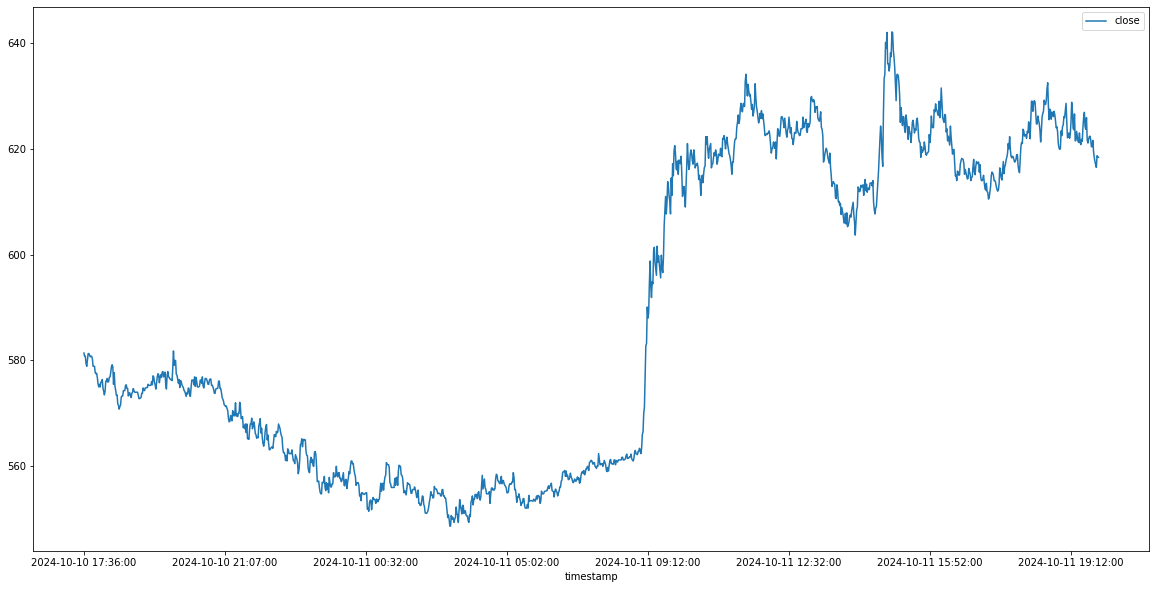

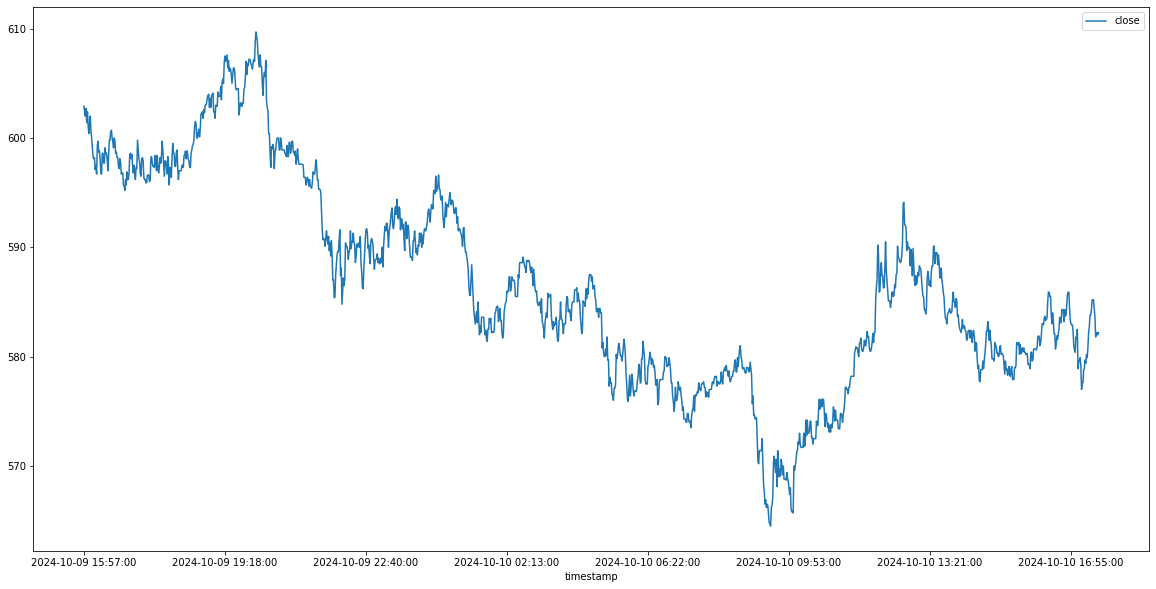

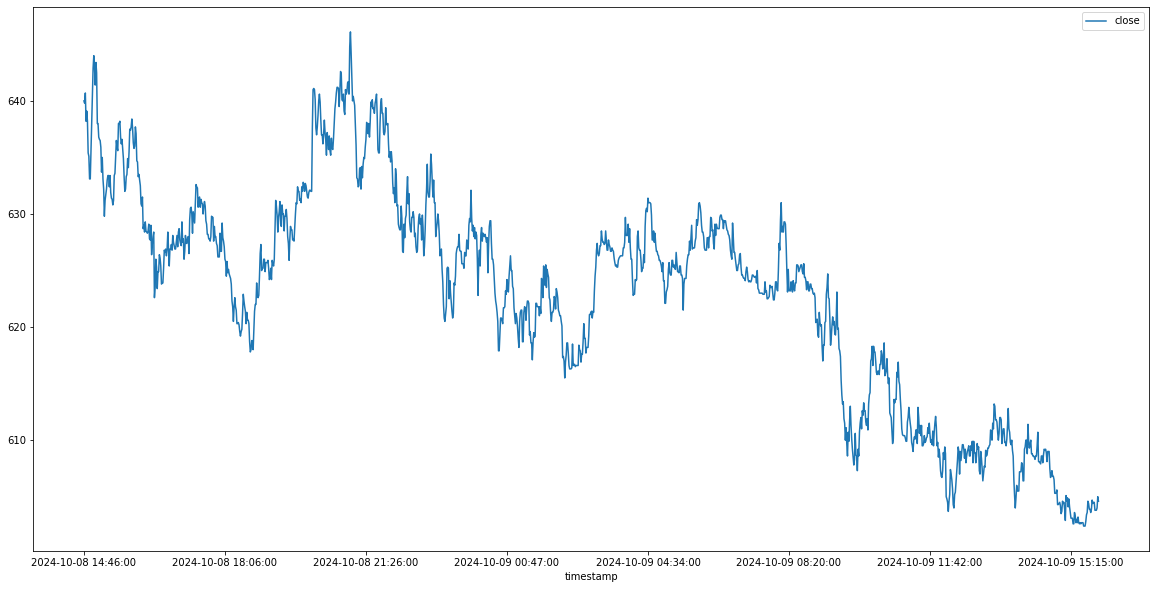

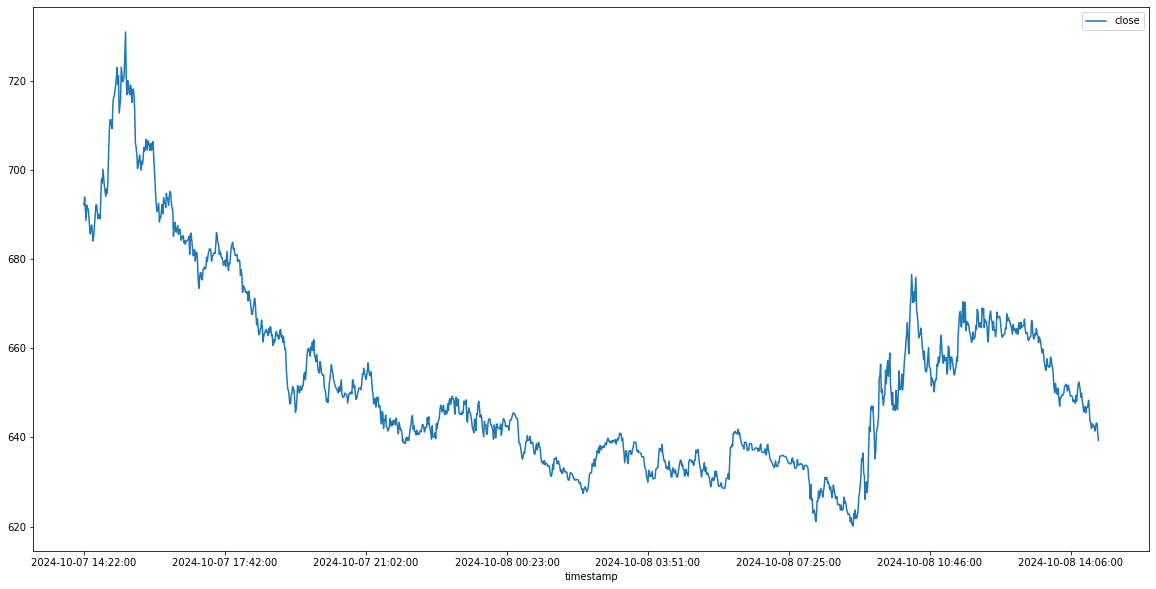

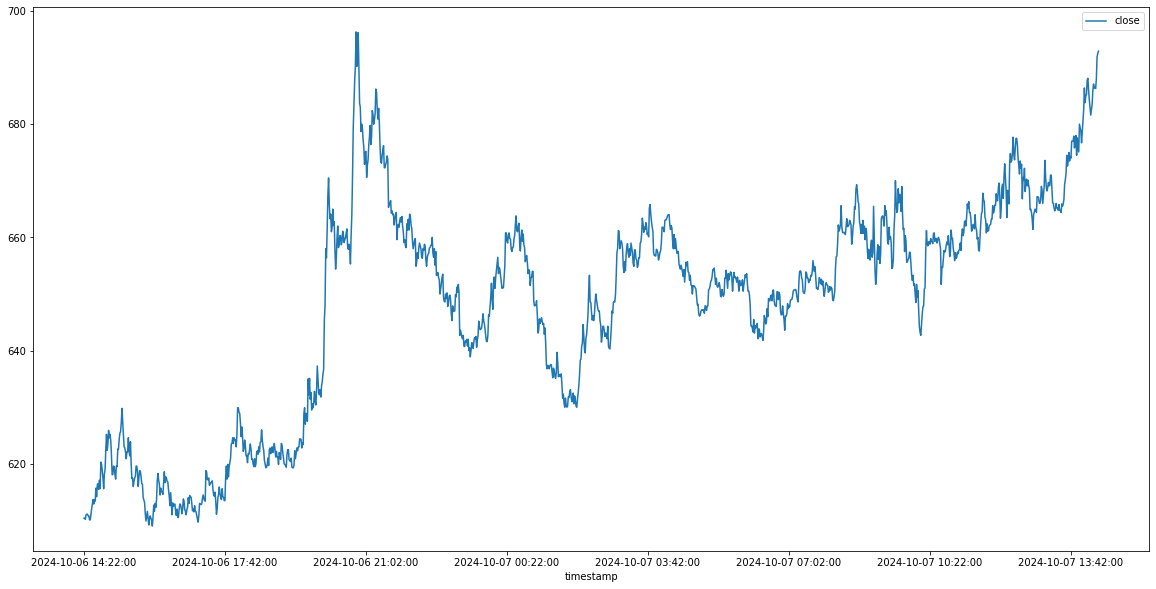

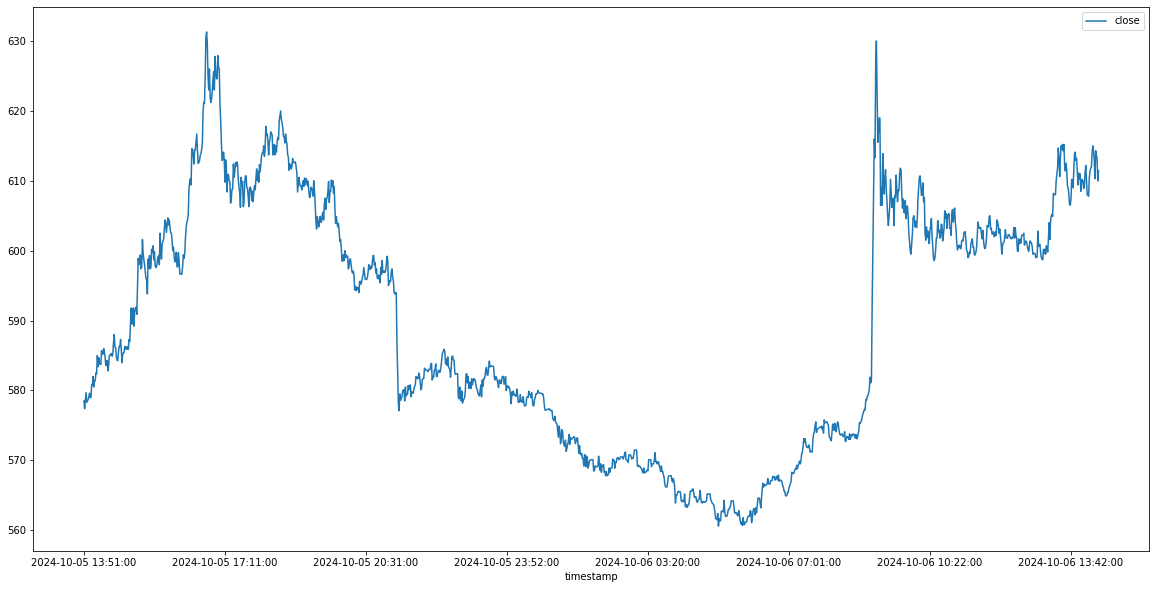

In [56]:
for i in range(1, 7):
    df.iloc[(-60*24)*(i+1):(-60*24)*i].plot(x='timestamp', y='close', figsize=(20, 10))
    print((df.iloc[(-60*24)*(i+1):(-60*24)*i].close.std()))

In [1]:
import pandas as pd

In [2]:
import os
coins = os.listdir('../data/from_pyupbit')

In [3]:
for coin in coins:
    print(f'start {coin}')
    df = pd.read_csv(f'../data/from_pyupbit/{coin}')
    print('Original', len(df))
    df.drop_duplicates(subset='timestamp', inplace=True)
    print('After Drop', len(df))
    df.to_csv(f'../data/from_pyupbit/{coin}', index=False)

start KRW-BTC.csv
Original 1594281
After Drop 1593942
start KRW-SEI.csv
Original 598768
After Drop 598058
start KRW-ETH.csv
Original 1576800
After Drop 1576800
start KRW-HIFI.csv
Original 1593891
After Drop 1590453
start KRW-UXLINK.csv
Original 72448
After Drop 71329
start KRW-XRP.csv
Original 1593993
After Drop 1593648
start KRW-SXP.csv
Original 1594162
After Drop 1589568
start KRW-SUI.csv
Original 719057
After Drop 718627
start KRW-ARK.csv
Original 1594056
After Drop 1593345
start KRW-SHIB.csv
Original 768600
After Drop 768237


In [1]:
import pandas as pd

In [2]:
import os
coins = os.listdir('../data/from_pyupbit')

In [3]:
coins = ['KRW-USDT', 'KRW-BIGTIME', 'KRW-CVC', 'KRW-SHIB', 'KRW-DOGE', 'KRW-UXLINK', 'KRW-XRP', 'KRW-SOL', 'KRW-BTC']

In [5]:
for coin in coins:
    print(f'start {coin}')
    df = pd.read_csv(f'../data/from_pyupbit/{coin}.csv')
    print('Original', len(df))
    df.drop_duplicates(subset='timestamp', inplace=True)
    print('After Drop', len(df))
    df.to_csv(f'../data/from_pyupbit/{coin}', index=False)

start KRW-USDT
Original 197777
After Drop 197777
start KRW-BIGTIME
Original 69174
After Drop 69174
start KRW-CVC
Original 1701084
After Drop 1701084
start KRW-SHIB
Original 771323
After Drop 771323
start KRW-DOGE
Original 1886922
After Drop 1886922
start KRW-UXLINK
Original 74395
After Drop 74395
start KRW-XRP
Original 3126000
After Drop 3126000
start KRW-SOL
Original 1554582
After Drop 1554582
start KRW-BTC
Original 3126000
After Drop 3126000
